# References
- [Google Colab Terbaru](https://colab.research.google.com/drive/1tFIa6Gbf1LoIg485iQfjzPpL2Zj50JDm?usp=sharing)
- https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Binary%20Classification.ipynb

# Install Libraries

In [59]:
!pip install pycaret

# Import Libraries

In [60]:
import pycaret
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Data Understanding

## Load Data

In [61]:
data = pd.read_csv("https://gmaaliki.github.io/dataset/predictive_maintenance.csv")
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [62]:
data.drop(['Failure Type'], axis=1, inplace=True)
data.drop(['UDI', 'Product ID'], axis=1, inplace=True)
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


,count
Target,
0,9661
1,339


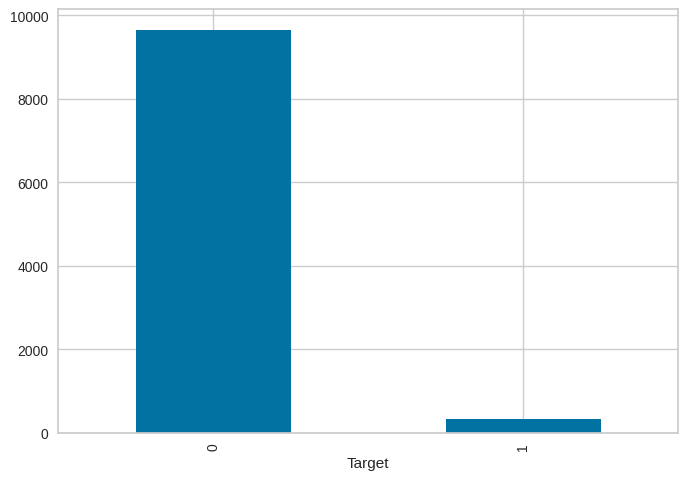

In [63]:
# Plot the bar plot of Target class count
target_counts = data['Target'].value_counts()
target_counts.plot(kind='bar')
target_counts

# Data Preparation

# Modeling

## Setup

In [64]:
target_col = "Target"

In [65]:
from pycaret.classification import *
s = setup(
    data,
    target = target_col,
    # remove_multicollinearity = True,
    # remove_outliers = True,
    # normalize = True,
    # pca = True,
    fix_imbalance = True,
    # feature_selection = True,
    session_id = 123)

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Binary
3,Original data shape,"(10000, 7)"
4,Transformed data shape,"(16526, 9)"
5,Transformed train set shape,"(13526, 9)"
6,Transformed test set shape,"(3000, 9)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


In [66]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [67]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [68]:
# init setup on exp
exp.setup(
    data,
    target = target_col,
    # remove_multicollinearity = True,
    # remove_outliers = True,
    # normalize = True,
    # pca = True,
    fix_imbalance = True,
    # feature_selection = True,
    session_id = 123)

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Binary
3,Original data shape,"(10000, 7)"
4,Transformed data shape,"(16526, 9)"
5,Transformed train set shape,"(13526, 9)"
6,Transformed test set shape,"(3000, 9)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


## Compare Model

In [69]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9750,0.9683,0.7717,0.6163,0.6803,0.6676,0.6748,1.1640
xgboost,Extreme Gradient Boosting,0.9734,0.9669,0.7632,0.5942,0.6638,0.6503,0.6582,0.4700
et,Extra Trees Classifier,0.9696,0.9464,0.5859,0.5567,0.5625,0.5470,0.5515,0.9350
rf,Random Forest Classifier,0.9663,0.9590,0.6493,0.5101,0.5666,0.5495,0.5563,1.6870
dummy,Dummy Classifier,0.9661,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1000
dt,Decision Tree Classifier,0.9559,0.8018,0.6366,0.4069,0.4944,0.4726,0.4867,0.1880
gbc,Gradient Boosting Classifier,0.9474,0.9668,0.8312,0.3804,0.5199,0.4965,0.5402,2.5810
ada,Ada Boost Classifier,0.9320,0.9477,0.7803,0.3061,0.4387,0.4100,0.4619,0.6240
knn,K Neighbors Classifier,0.8900,0.8531,0.6658,0.1862,0.2907,0.2511,0.3124,0.2890
lr,Logistic Regression,0.8254,0.8969,0.8226,0.1425,0.2428,0.1964,0.2958,2.0870


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Analyze Model

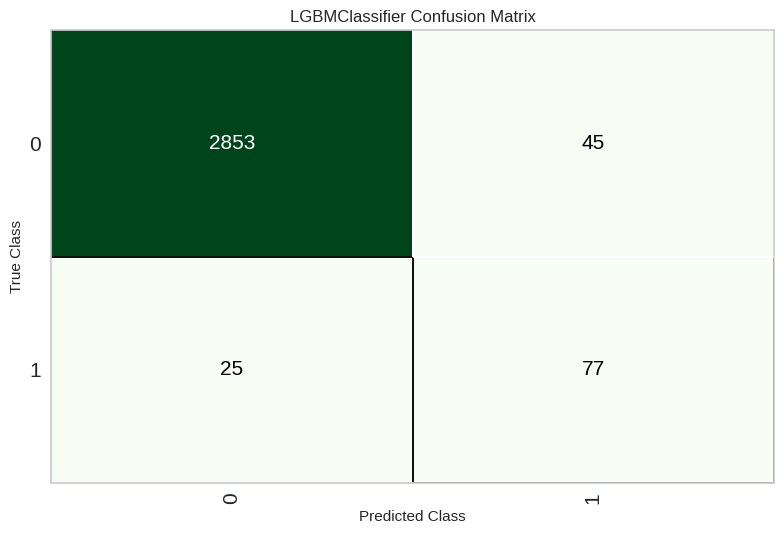

In [70]:
plot_model(best, plot = 'confusion_matrix')

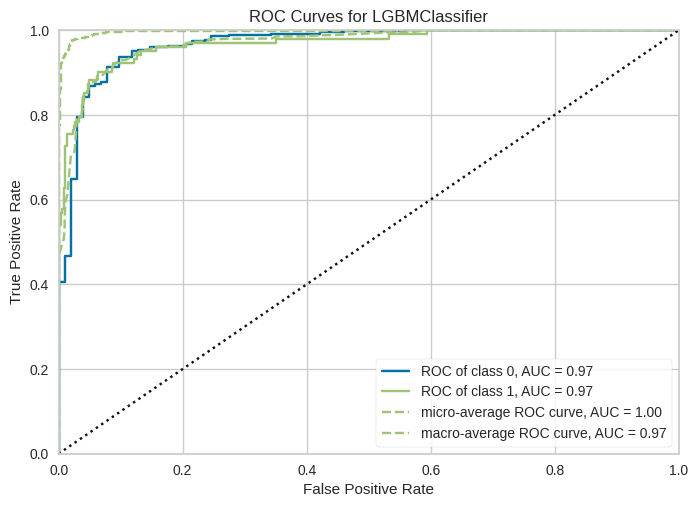

In [71]:
plot_model(best, plot = 'auc')

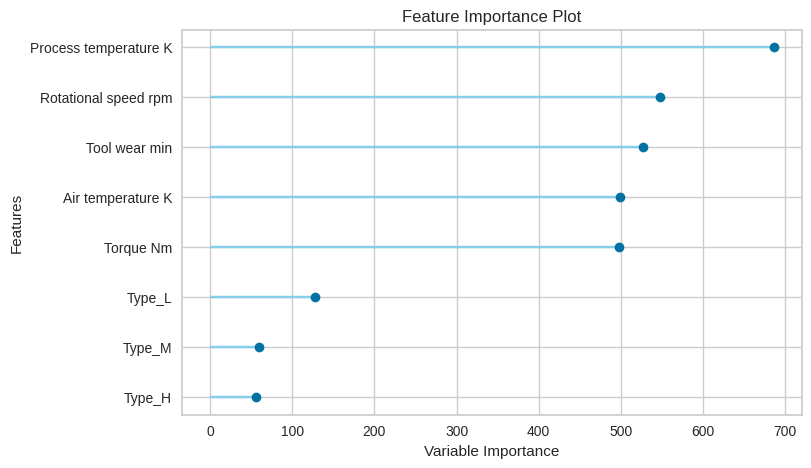

In [72]:
plot_model(best, plot = 'feature')

In [73]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Predict

In [74]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9767,0.9684,0.7549,0.6311,0.6875,0.6755,0.6784


In [75]:
holdout_pred.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,prediction_label,prediction_score
4643,L,303.200012,311.399994,1324,54.200001,228,1,1,0.9955
1053,M,296.700012,307.700012,1597,32.099998,114,0,0,0.9998
708,M,297.600006,308.799988,1416,45.900002,101,0,0,0.9993
7414,L,300.100006,311.100006,1619,33.400002,186,0,0,0.9947
979,L,296.200012,306.799988,1389,53.299999,132,0,0,0.9996


## Save Model

In [76]:
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Air temperature [K]',
                                              'Process temperature [K]',
                                              'Rotational speed [rpm]',
                                              'Torque [Nm]', 'Tool wear [min]'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categori...
                  LGBMClassifier(boosting_type='gb

In [77]:
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Air temperature [K]',
                                             'Process temperature [K]',
                                             'Rotational speed [rpm]',
                                             'Torque [Nm]', 'Tool wear [min]'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean')))...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

# Ensemble Modeling

## Define Ensemble Model

In [89]:
best_models_top = compare_models(sort = 'AUC', n_select = 3)
best_models_top

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9750,0.9683,0.7717,0.6163,0.6803,0.6676,0.6748,1.1860
xgboost,Extreme Gradient Boosting,0.9734,0.9669,0.7632,0.5942,0.6638,0.6503,0.6582,0.3970
gbc,Gradient Boosting Classifier,0.9474,0.9668,0.8312,0.3804,0.5199,0.4965,0.5402,2.4680
rf,Random Forest Classifier,0.9663,0.9590,0.6493,0.5101,0.5666,0.5495,0.5563,1.6740
ada,Ada Boost Classifier,0.9320,0.9477,0.7803,0.3061,0.4387,0.4100,0.4619,0.6750
et,Extra Trees Classifier,0.9696,0.9464,0.5859,0.5567,0.5625,0.5470,0.5515,0.6980
ridge,Ridge Classifier,0.8203,0.8990,0.8351,0.1406,0.2405,0.1938,0.2957,0.1320
lda,Linear Discriminant Analysis,0.8203,0.8990,0.8351,0.1406,0.2405,0.1938,0.2957,0.1350
lr,Logistic Regression,0.8254,0.8969,0.8226,0.1425,0.2428,0.1964,0.2958,1.1560
svm,SVM - Linear Kernel,0.7420,0.8650,0.7062,0.1880,0.2358,0.1915,0.2563,0.2630


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, 

In [90]:
blender = blend_models(
    best_models_top
    )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9786,0.9672,0.7391,0.6538,0.6939,0.6828,0.6842
1,0.9586,0.9742,0.7391,0.4250,0.5397,0.5196,0.5416
2,0.9814,0.9308,0.8261,0.6786,0.7451,0.7356,0.7394
3,0.9757,0.9546,0.7083,0.6296,0.6667,0.6541,0.6553
4,0.9714,0.9826,0.7917,0.5588,0.6552,0.6407,0.6513
5,0.9757,0.9806,0.8333,0.6061,0.7018,0.6894,0.6989
6,0.9657,0.9800,0.8333,0.5000,0.6250,0.6082,0.6301
7,0.9786,0.9775,0.7917,0.6552,0.7170,0.7059,0.7094
8,0.9686,0.9853,0.7083,0.5312,0.6071,0.5911,0.5978


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Analyze Model

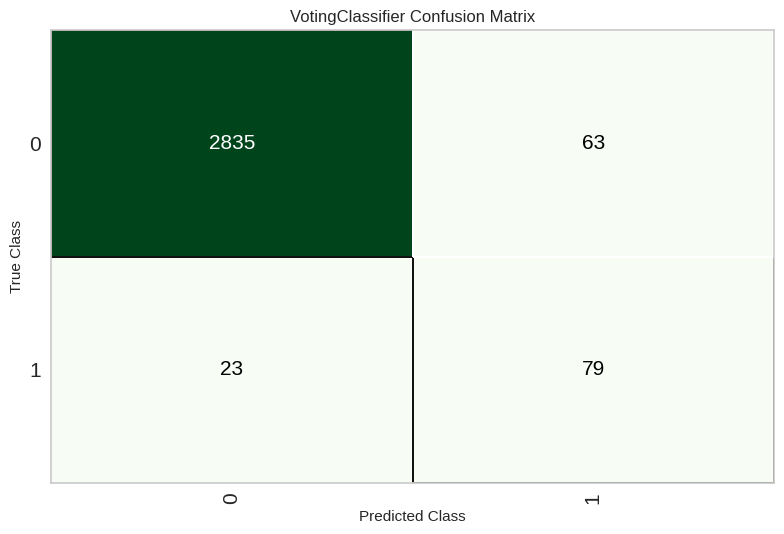

In [91]:
plot_model(blender, plot = 'confusion_matrix')

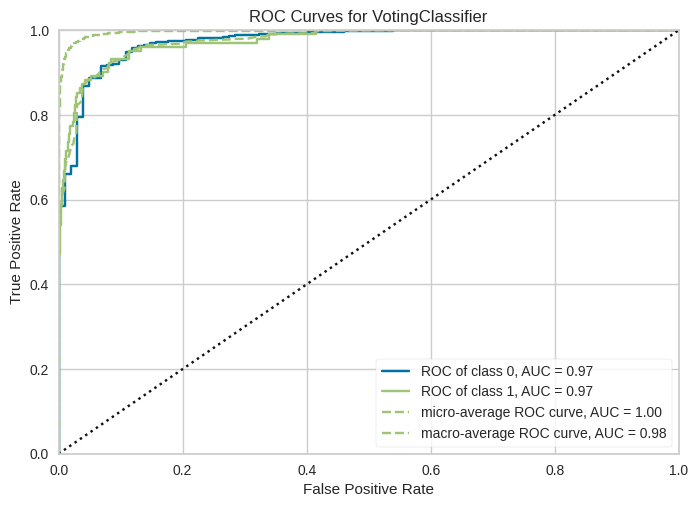

In [92]:
plot_model(blender, plot = 'auc')

In [93]:
evaluate_model(blender)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Predict

In [94]:
holdout_pred = predict_model(blender)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9713,0.9747,0.7745,0.5563,0.6475,0.6330,0.6424


In [95]:
holdout_pred.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,prediction_label,prediction_score
4643,L,303.200012,311.399994,1324,54.200001,228,1,1,0.9961
1053,M,296.700012,307.700012,1597,32.099998,114,0,0,0.9977
708,M,297.600006,308.799988,1416,45.900002,101,0,0,0.9966
7414,L,300.100006,311.100006,1619,33.400002,186,0,0,0.9849
979,L,296.200012,306.799988,1389,53.299999,132,0,0,0.9906


## Save Model

In [96]:
save_model(blender, 'blended_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Air temperature [K]',
                                              'Process temperature [K]',
                                              'Rotational speed [rpm]',
                                              'Torque [Nm]', 'Tool wear [min]'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categori...
                                                  

In [97]:
loaded_best_pipeline = load_model('blended_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Air temperature [K]',
                                             'Process temperature [K]',
                                             'Rotational speed [rpm]',
                                             'Torque [Nm]', 'Tool wear [min]'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean')))...
                                                                          max_features=None,
                                                                          max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,
                                                                          min_samples_leaf=1,
                                                                          min_samples_split=2,
                                                                          min_weight_fraction_leaf=0.0,
                                                                          n_estimators=100,
                                                                          n_iter_no_change=None,
                                                                          random_state=123,
                                                                          subsample=1.0,
                                                                          tol=0.0001,
                                                                          validation_fraction=0.1,
                                                                          verbose=0,
                                                                          warm_start=False))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='soft',
                                  weights=None))],
         verbose=False)